# `AA Workshop 7` — Coding Challenge

Complete the tasks below to practice implementing classification modeling from `W7_Classification_Basic.ipynb`.

Guidelines:
- Work in order. Run each cell after editing with Shift+Enter.
- Keep answers short; focus on making things work.
- If a step fails, read the error and fix it.

By the end you will have exercised:
- implementing an SVM classifier
- understanding evaluation metrics such as precision recall curves

## Task 1 - Detecting Forged Banknotes

To practice implementing a support vector machine classification model, we will use a well-known dataset containing data extracted from images that were taken from genuine and forged banknote-like specimens. You can find the raw data as `BankNote_Authentication.csv` in the `data` directory. Familiarize yourself with the data [via this link](https://archive.ics.uci.edu/dataset/267/banknote+authentication). 
- Load and inspect the data. Create a pairplot to do so.
- Train an SVM model (using `LinearSVC`) using all available features. 
- Properly evaluate model performance using accuracy, precision and recall. To do so, a simple two-way split suffices as we are not tuning hyper-parameters.

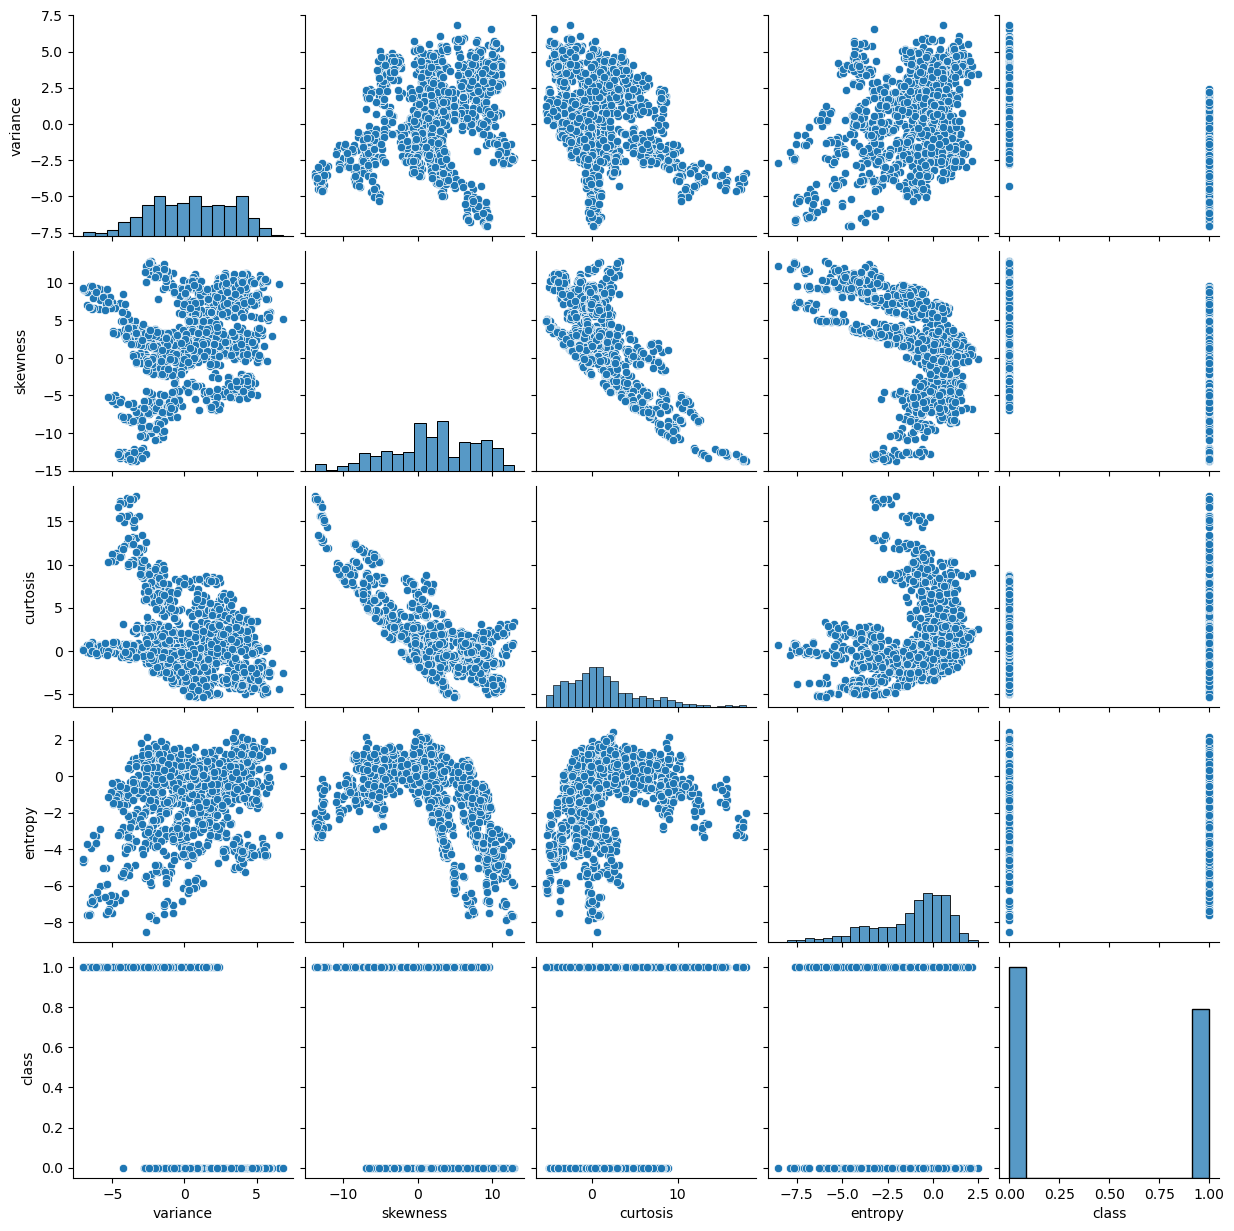

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("../data/BankNote_Authentication.csv")
# Create pairplot
sns.pairplot(df)




## Task 2 - Understanding Precision-Recall Curves

You got to know several metrics to evaluate classifier performance. While accuracy, precision and recall are usually quite straightforward to interpret, ROC and Precision-Recall curves require a bit more thinking. In the notebook, we calculated the Precision-Recall Curve for our SVM model as follows:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve

# prepare data
cancer_df = pd.read_csv("../data/breast_cancer.csv", index_col = "id")
X = np.array(cancer_df[['area_mean','concave points_mean']])
Y = cancer_df['diagnosis'].values
norm = StandardScaler()
X_norm = norm.fit_transform(X)

# model
model_SVM = LinearSVC(loss='hinge')
model_SVM.fit(X_norm, Y)


# generate curve
PrecisionRecallDisplay.from_estimator(model_SVM, X_norm, Y, plot_chance_level=True)
plt.show()

**Question**: Why is the chance level precision not at 50% (like for ROC curves)? Does it have to do with the data or the model? First, figure out the reason, then try to re-create the plot but with a 50% chance level precision.

Explanation: 
Task 2 Explanation: Precision-Recall Curve Chance Level
Why isn't the chance level at 50%?
The chance level in a Precision-Recall curve equals the proportion of positive samples in the dataset, not 50%.

Formula: Chance Precision = Positives / Total Samples

In the breast cancer dataset:

B (Benign) is the majority class
M (Malignant) is the minority/positive class (~37% of data)
So the chance level is ~37%, not 50%.

Why is this different from ROC curves?
Metric	ROC Curve	PR Curve
Chance level	Always 50%	Depends on class balance
Reason	Uses TPR vs FPR (both relative to their class)	Precision depends on class proportions
The Solution
To get a 50% chance level, you need balanced classes (equal positives and negatives).

The code does this by downsampling the majority class:
# Downsample majority class to match minority class size
df_majority_downsampled = resample(df_majority, 
                                   replace=False,
                                   n_samples=len(df_minority),
                                   random_state=42)

# Now both classes have equal counts → 50% chance level

In [ ]:
# your code here


